In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns

import yfinance as yf

In [2]:
nvda = yf.download('nvda', start='2023-1-1')
baba = yf.download('baba', start='2023-1-1')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

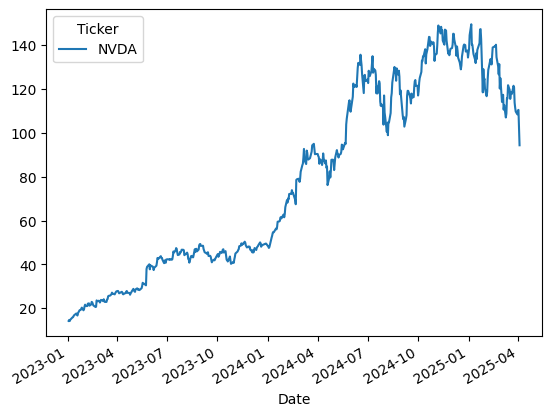

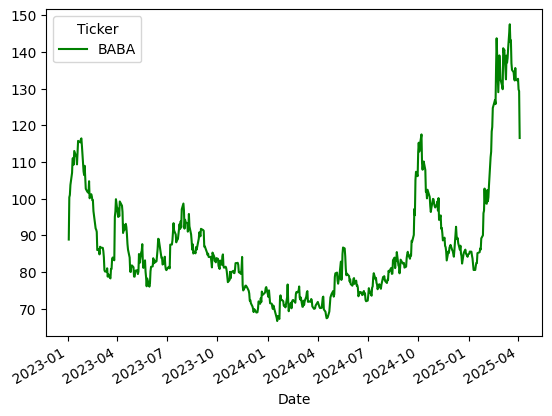

In [4]:
nvda['Close'].plot()
baba['Close'].plot(color="green")

## Aggregation

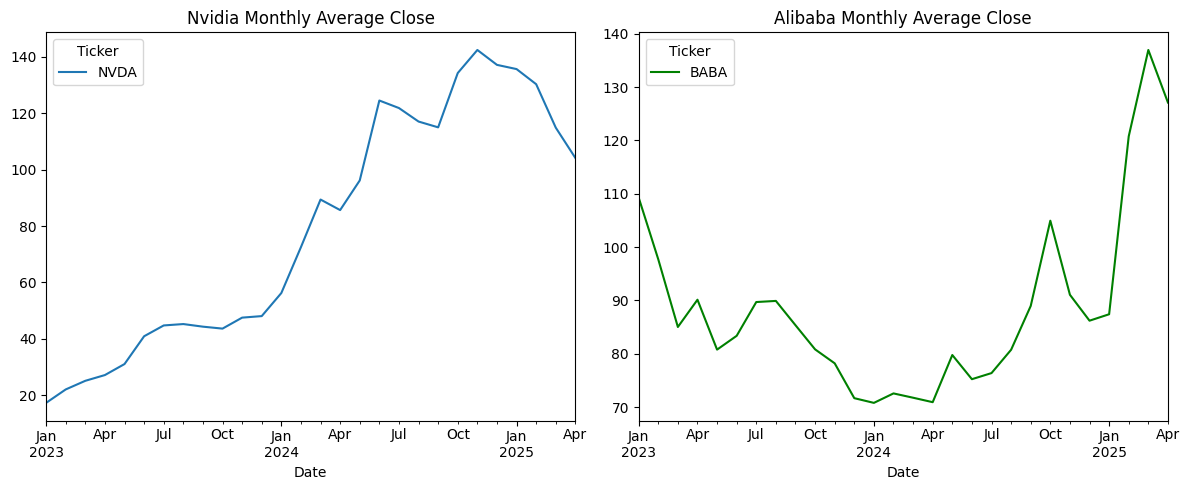

In [5]:
# aggregation by month
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

nvda['Close'].resample('ME').mean().plot(ax=ax1, title='Nvidia Monthly Average Close')
baba['Close'].resample('ME').mean().plot(ax=ax2, title='Alibaba Monthly Average Close', color="green")

plt.tight_layout()
plt.show()

/var/folders/q3/01l9rk8x7cs2gfyjdw1bfx3m0000gn/T/ipykernel_14702/3637470587.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  nvda['Close'].resample('Q').mean().plot(ax=ax1, title='Nvidia Quarterly Average Close')
/var/folders/q3/01l9rk8x7cs2gfyjdw1bfx3m0000gn/T/ipykernel_14702/3637470587.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  baba['Close'].resample('Q').mean().plot(ax=ax2, title='Alibaba Quarterly Average Close', color="green")


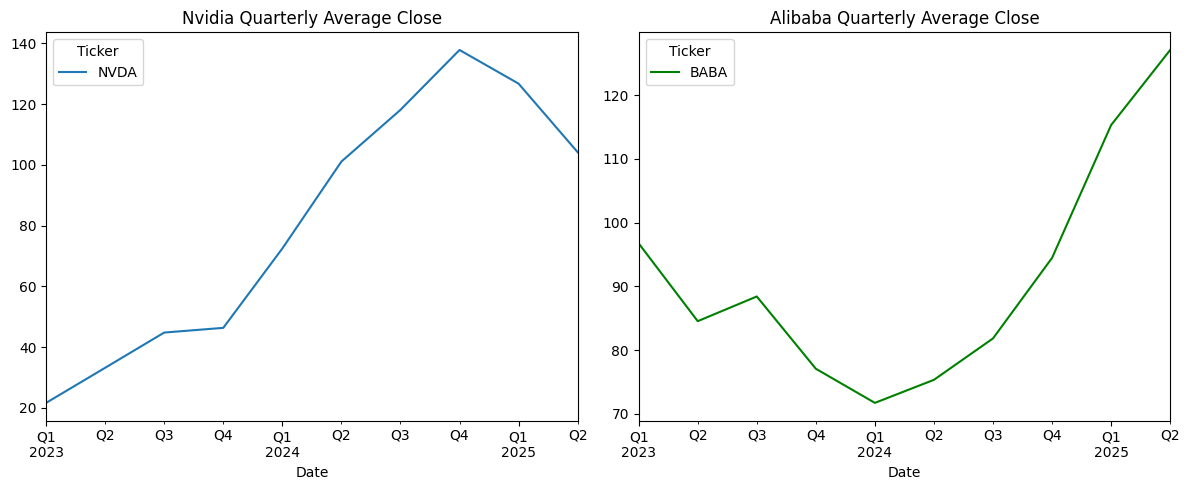

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

nvda['Close'].resample('Q').mean().plot(ax=ax1, title='Nvidia Quarterly Average Close')
baba['Close'].resample('Q').mean().plot(ax=ax2, title='Alibaba Quarterly Average Close', color="green")

plt.tight_layout()
plt.show()

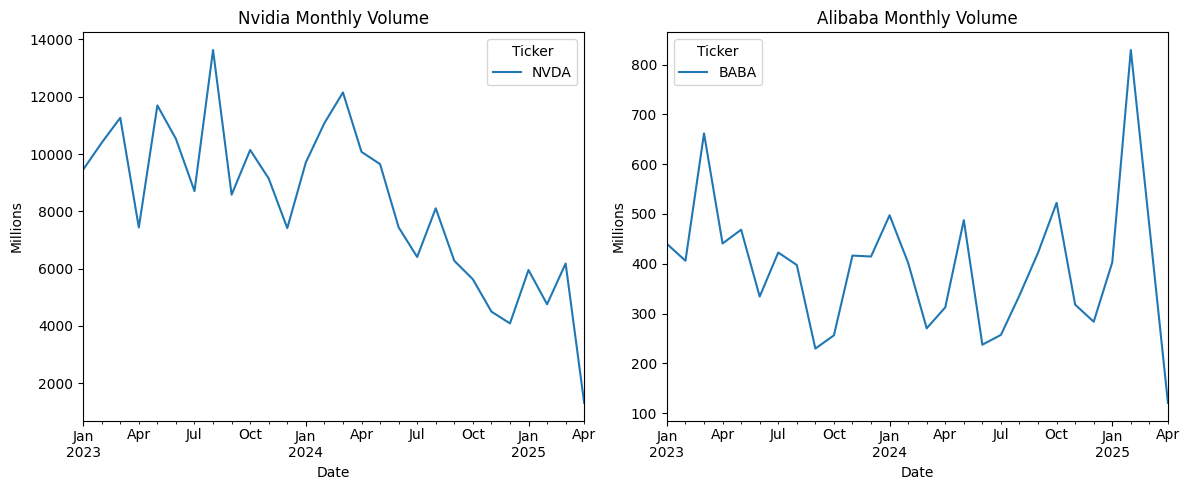

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

(nvda['Volume']/1000000).resample('ME').sum().plot(ax=ax1, title='Nvidia Monthly Volume')
(baba['Volume']/1000000).resample('ME').sum().plot(ax=ax2, title='Alibaba Monthly Volume')

ax1.set_ylabel('Millions')
ax2.set_ylabel('Millions')

plt.tight_layout()
plt.show()

## Moving averages

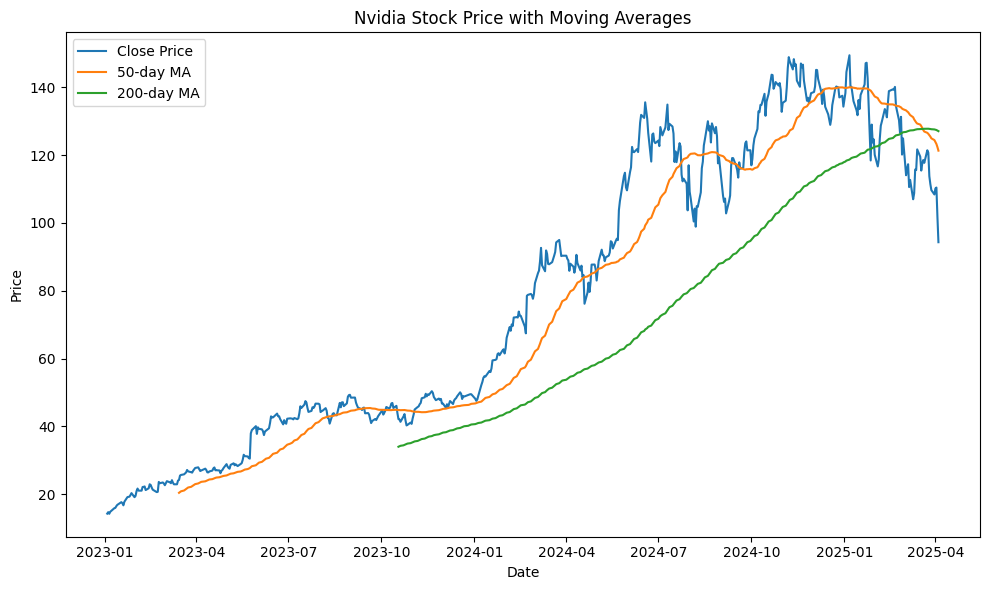

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(nvda.index, nvda['Close'], label='Close Price')
ax.plot(nvda.index, nvda['Close'].rolling(50).mean(), label='50-day MA')
ax.plot(nvda.index, nvda['Close'].rolling(200).mean(), label='200-day MA')

ax.legend()
ax.set_title('Nvidia Stock Price with Moving Averages')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# show the plot
plt.tight_layout()
plt.show()

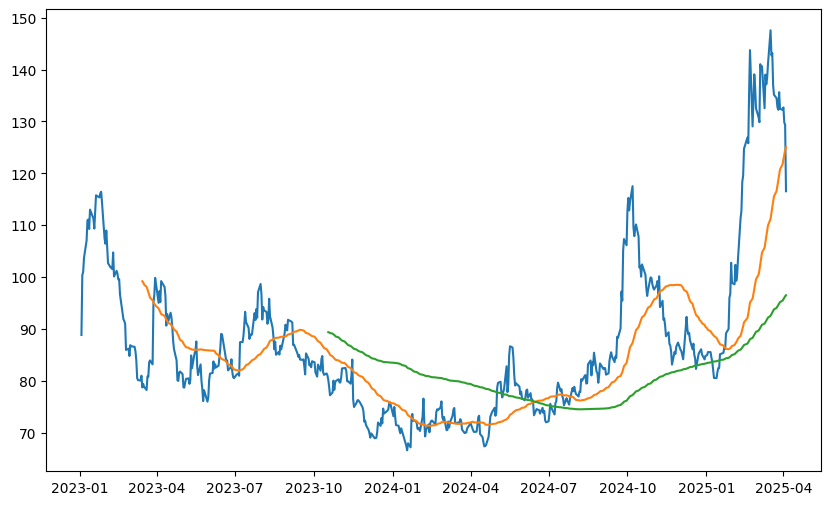

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(baba.index, baba['Close'], label='Close Price')
ax.plot(baba.index, baba['Close'].rolling(50).mean(), label='50-day MA')
ax.plot(baba.index, baba['Close'].rolling(200).mean(), label='200-day MA')

## Change percentages

In [11]:
nvda['change_pct'] = nvda['Close'].pct_change() * 100
baba['change_pct'] = baba['Close'].pct_change() * 100

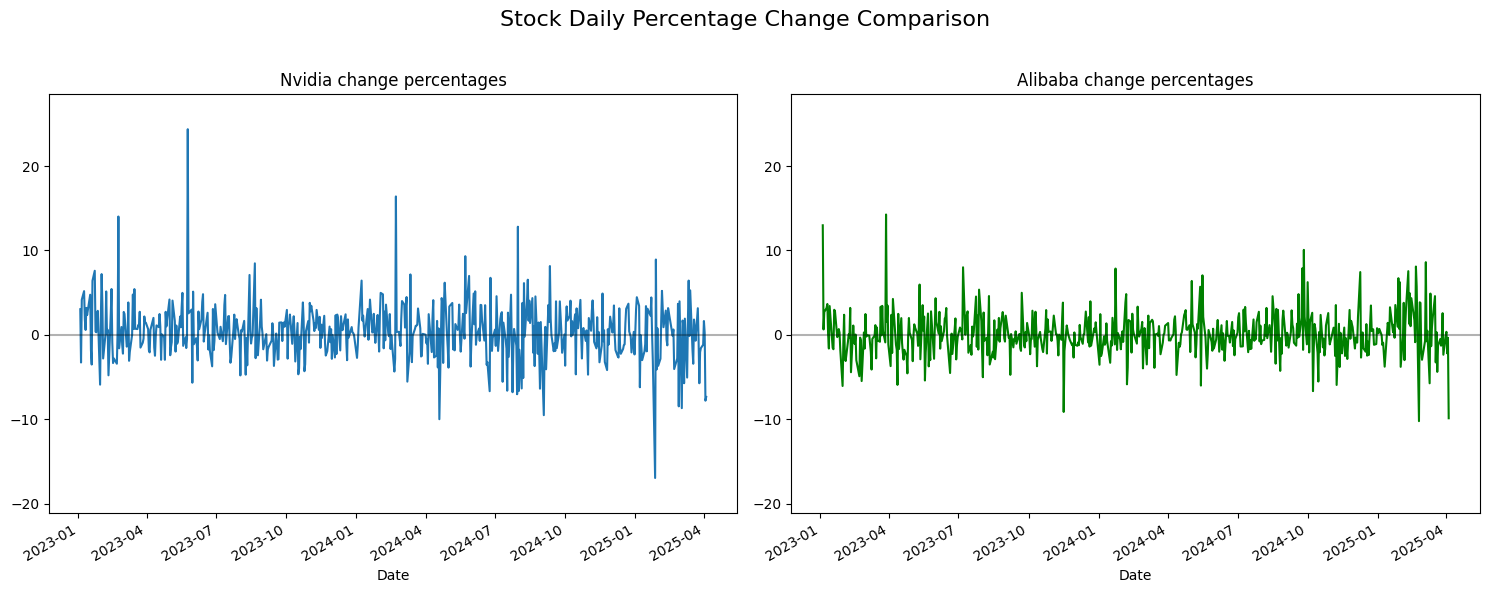

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

nvda['change_pct'].plot(ax=ax1, title="Nvidia change percentages")
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)

baba['change_pct'].plot(ax=ax2, title="Alibaba change percentages", color="green")
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# find the min and max to set aligned y-axis limits
all_data = np.concatenate([nvda['change_pct'].dropna(), baba['change_pct'].dropna()])
y_min = np.min(all_data)
y_max = np.max(all_data)

# add some padding to the limits
padding = (y_max - y_min) * 0.1
y_min -= padding
y_max += padding

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

fig.suptitle('Stock Daily Percentage Change Comparison', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [13]:
# Nvidia: percentage and the date of the max drop
lowest_change = nvda.nsmallest(1, 'change_pct').iloc[0]
lowest_change['change_pct'].values, lowest_change.name

(array([-16.96816481]), Timestamp('2025-01-27 00:00:00'))

In [14]:
# Nvidia: percentage and the date of the max rise
highest_change = nvda.nlargest(1, 'change_pct').iloc[0]
highest_change['change_pct'].values, highest_change.name

(array([24.36965147]), Timestamp('2023-05-25 00:00:00'))

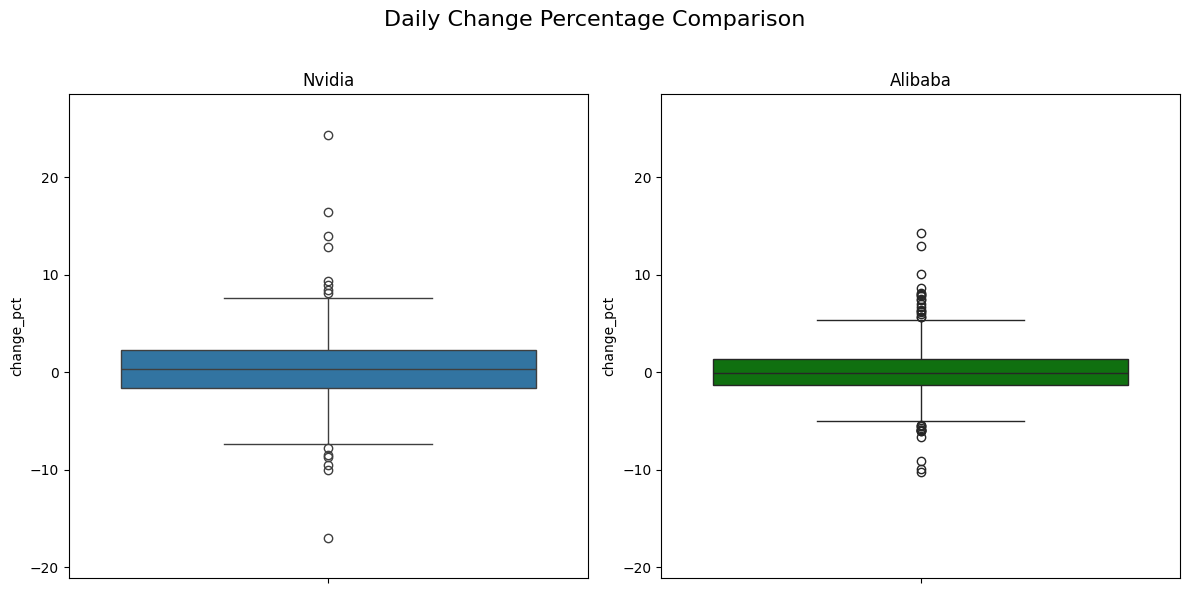

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=nvda['change_pct'], ax=ax1)
ax1.set_title('Nvidia')

sns.boxplot(data=baba['change_pct'], ax=ax2, color="green")
ax2.set_title('Alibaba')

all_data = np.concatenate([nvda['change_pct'].dropna(), baba['change_pct'].dropna()])
y_min = np.min(all_data)
y_max = np.max(all_data)

padding = (y_max - y_min) * 0.1
y_min -= padding
y_max += padding

# set the same y-axis limits for both plots
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

fig.suptitle('Daily Change Percentage Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [16]:
# dayw when either Nvidia or Alibaba had absolute change over 8%
changes_df = pd.concat([nvda['change_pct'].rename("nvda_change"), baba['change_pct'].rename("baba_change")], axis=1)
changes_df[(abs(changes_df['nvda_change'])>8) | (abs(changes_df['baba_change'])>8)]

,nvda_change,baba_change
Date,,
2023-01-04,3.031789,12.981081
2023-02-23,14.021393,-0.654138
2023-03-28,-0.456073,14.259162
2023-05-25,24.369651,-2.992242
2023-07-07,0.950038,8.003345
2023-08-21,8.471332,0.613423
2023-11-16,1.210936,-9.142066
2024-02-22,16.400873,0.714471
2024-04-19,-10.004596,0.275843


In [17]:
# There's weak correlation between Nvidia and Alibaba changes.
changes_df.corr()

,nvda_change,baba_change
nvda_change,1.000000,0.164868
baba_change,0.164868,1.000000


## Volatility

In [18]:
nvda['change_pct'].rolling(252).std() * (252**0.5)

Date
2023-01-03          NaN
2023-01-04          NaN
2023-01-05          NaN
2023-01-06          NaN
2023-01-09          NaN
                ...    
2025-03-31    56.266732
2025-04-01    56.286638
2025-04-02    56.286569
2025-04-03    56.834071
2025-04-04    57.319853
Name: change_pct, Length: 566, dtype: float64

<Axes: xlabel='Date'>

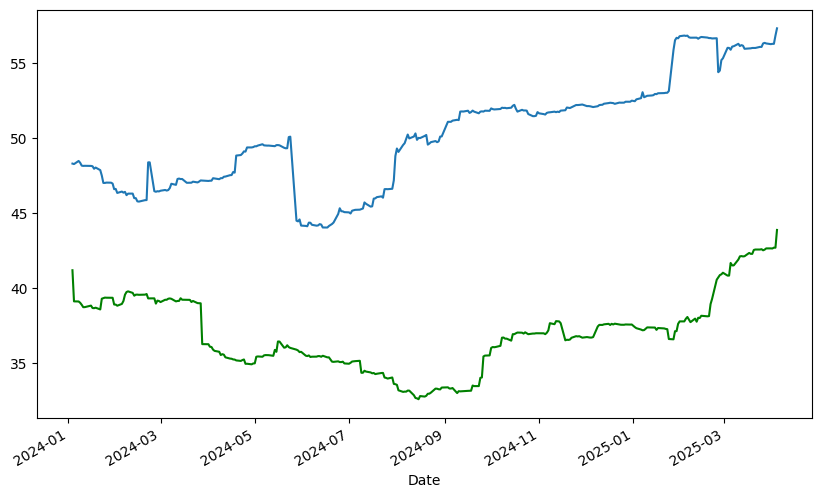

In [19]:
plt.figure(figsize = (10, 6))
(nvda['change_pct'].rolling(252).std() * (252**0.5)).plot(label="Nvidia")
(baba['change_pct'].rolling(252).std() * (252**0.5)).plot(label="Alibaba", color="green")

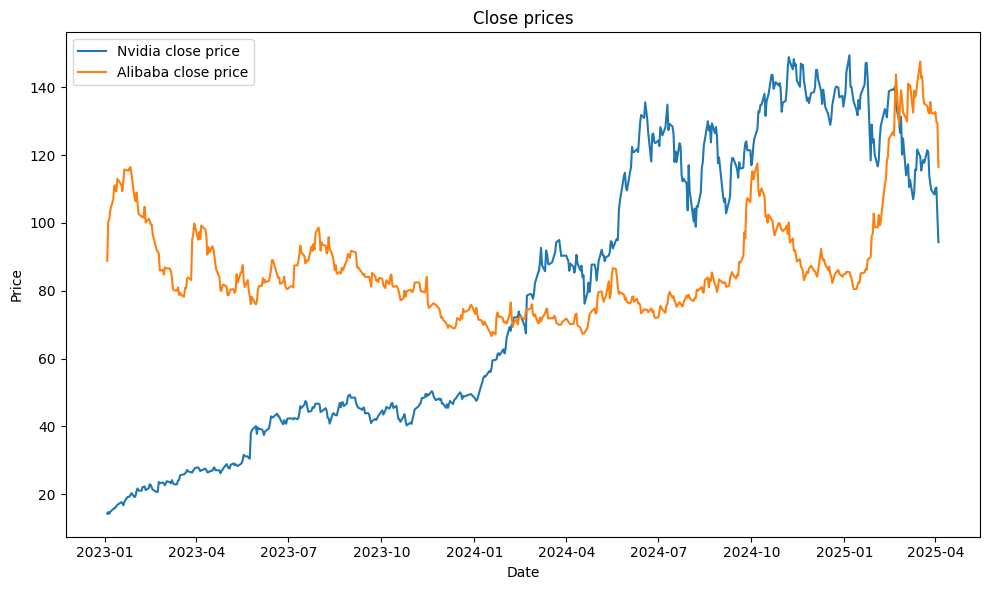

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(nvda.index, nvda['Close'], label="Nvidia close price")
ax.plot(baba.index, baba['Close'], label="Alibaba close price")
ax.legend()
ax.set_title('Close prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.tight_layout()
plt.show()

## Relation to weekdays

In [21]:
weekdays = ['mon', 'tue', 'wed', 'thu', 'fri']

nvda['Weekday'] = nvda.index.weekday
baba['Weekday'] = baba.index.weekday

In [22]:
df1 = nvda.groupby('Weekday')['change_pct'].describe()
df1.index = weekdays
df1

,count,mean,std,min,25%,50%,75%,max
mon,104.0,0.493913,3.403085,-16.968165,-1.012810,0.584661,2.368669,8.471332
tue,116.0,0.402894,2.961736,-9.525010,-1.361555,0.411756,2.150353,8.925873
wed,115.0,0.260279,3.174499,-6.803164,-1.824222,0.245117,2.366876,12.812096
thu,114.0,0.694322,4.197271,-8.478061,-1.355013,0.550247,2.428976,24.369651
fri,116.0,0.108782,2.792241,-10.004596,-1.828757,-0.003702,2.028949,6.406176


In [23]:
# Let's test whether there is a significant difference between Thursday and Friday

# Forming groups to compare
thu = nvda['change_pct'][nvda['Weekday']==3]
fri = nvda['change_pct'][nvda['Weekday']==4]

# Two independent (ind) samples t-test
ttest_ind(thu, fri, equal_var=False, nan_policy='omit')

TtestResult(statistic=np.float64(1.2434456029624754), pvalue=np.float64(0.2151873992766945), df=np.float64(196.2009016169404))

In [24]:
df2 = baba.groupby('Weekday')['change_pct'].describe()
df2.index = weekdays
df2

,count,mean,std,min,25%,50%,75%,max
mon,104.0,0.179095,2.412684,-10.233048,-1.073860,0.035515,1.189080,7.545162
tue,116.0,0.004280,2.927642,-6.671202,-1.575531,-0.379038,1.372521,14.259162
wed,115.0,0.005190,2.448797,-5.934254,-1.375186,-0.089858,1.104172,12.981081
thu,114.0,0.334833,2.792485,-9.142066,-1.197929,0.113190,1.441607,10.067045
fri,116.0,-0.097887,2.551633,-9.889431,-1.665578,-0.218106,1.453772,8.003345


In [25]:
# Let's test whether there is a significant difference between Tuesday and Thursday

# Forming groups to compare
tue = baba['change_pct'][baba['Weekday']==1]
thu = baba['change_pct'][baba['Weekday']==3]

# Two independent (ind) samples t-test
ttest_ind(tue, thu, equal_var=False, nan_policy='omit')

TtestResult(statistic=np.float64(-0.8762960954780995), pvalue=np.float64(0.38179220839591566), df=np.float64(227.79798019171588))

Since both p-values are greater than the typical significance level of 0.05, the differences between weekdays are not statistically significant. 